<a href="https://colab.research.google.com/github/itsTIMUS/colab-projects/blob/main/ML/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
import os
print(os.listdir())

['.config', 'kaggle (1).json', 'sample_data']


In [ ]:
# Step 2: Move it to the correct path and set permissions
!mkdir -p ~/.kaggle
!cp "kaggle (1).json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c cifar-10

 96% 685M/715M [00:04<00:00, 257MB/s]
100% 715M/715M [00:04<00:00, 178MB/s]


In [ ]:
!ls

 cifar-10.zip  'kaggle (1).json'   sample_data


In [ ]:
from zipfile import ZipFile

dataset = "/content/cifar-10.zip"

with ZipFile(dataset, 'r') as zip_ref:
    zip_ref.extractall("cifar10_data")
    print("Zip file is extraxted")


Zip file is extraxted


In [ ]:
import os
print(os.listdir("cifar10_data"))

['train.7z', 'sampleSubmission.csv', 'trainLabels.csv', 'test.7z']


In [ ]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.4/96.4 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.9/412.9 kB 24.2 MB/s eta 0:00:00


In [ ]:
import py7zr
archive = py7zr.SevenZipFile('/content/cifar10_data/train.7z', mode='r')
archive.extractall(path='/content/cifar10_data/')
archive.close()

In [ ]:
import os

# Check root extraction path
print("Root:", os.listdir("/content/cifar10_data"))

# If a train folder was created, check inside it
train_path = "/content/cifar10_data/train"
if os.path.exists(train_path):
    print("Train images:", len(os.listdir(train_path)))
else:
    print("Train folder not found. Files may be extracted directly.")


Root: ['train.7z', 'sampleSubmission.csv', 'train', 'trainLabels.csv', 'test.7z']
Train images: 50000


In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [ ]:
filenames = os.listdir("/content/cifar10_data/train")

In [ ]:
type(filenames)

list

In [ ]:
print(filenames[0:5])

['7511.png', '9976.png', '2459.png', '18051.png', '49418.png']


In [ ]:
print(filenames[-5:])

['41825.png', '2519.png', '29912.png', '21374.png', '34580.png']


In [ ]:
#label processing
labels_df = pd.read_csv("/content/cifar10_data/trainLabels.csv")

In [ ]:
labels_df.shape

(50000, 2)

In [ ]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [ ]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [ ]:
labels_df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [ ]:
label_dictionary = {'airplane':0,'automobile':1,'bird':2,'cat':3,'deer':4,'dog':5,
                    'frog':6,'horse':7,'ship':8,'truck':9,}

labels = [label_dictionary[i] for i in labels_df['label']]

In [ ]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


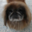

In [ ]:
#displaying the images
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread("/content/cifar10_data/train/1000.png")
cv2_imshow(img)


In [ ]:
id_list = list(labels_df['id'])

In [ ]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


In [ ]:
#image processing

train_data_folder = "/content/cifar10_data/train"
data = []
for id in id_list:
  image = Image.open(os.path.join(train_data_folder, f"{id}.png"))
  image = image.resize((32,32))
  image = np.array(image)
  data.append(image)

In [ ]:
type(data)

list

In [ ]:
len(data)

50000

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(32, 32, 3)

In [ ]:
#convert image list  and labels to numpy array
x = np.array(data)
y=np.array(labels)

In [ ]:
print(x.shape)
print(y.shape)

(50000, 32, 32, 3)
(50000,)


In [ ]:
#train  test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
#scaling the data
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [ ]:
#building the neural network
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_class = 10
#setting up the layer of neural networks
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(num_of_class,activation='softmax'),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#train the neural network
model.fit(x_train_scaled,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2515 - loss: 2.0716 - val_accuracy: 0.3285 - val_loss: 1.8628
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3586 - loss: 1.8059 - val_accuracy: 0.3850 - val_loss: 1.7319
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3799 - loss: 1.7403 - val_accuracy: 0.3957 - val_loss: 1.6839
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3890 - loss: 1.7135 - val_accuracy: 0.4050 - val_loss: 1.6672
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4040 - loss: 1.6770 - val_accuracy: 0.3832 - val_loss: 1.7090
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4086 - loss: 1.6615 - val_accuracy: 0.4042 - val_loss: 1.6481
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4159 - loss: 1.6395 - val_accuracy: 0.3907 - val_loss: 1.6579
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4178 - loss: 1.6259 - 

In [ ]:
#RestNet50
from tensorflow.keras import Sequential,models,layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [ ]:
covolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
covolutional_base.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
#num_of_class = 10
#model = models.Sequential()
#model.add(layers.UpSampling2D((2,2)))
#model.add(layers.UpSampling2D((2,2)))
#model.add(layers.UpSampling2D((2,2)))
#model.add(covolutional_base)
#model.add(layers.Flatten())
#model.add(layers.BatchNormalization())
#model.add(layers.Dense(128, activation='relu'))
#model.add(layers.Dropout(0.5))
#model.add(layers.BatchNormalization())
#model.add(layers.Dense(64, activation='relu'))
#model.add(layers.Dropout(0.5))
#model.add(layers.BatchNormalization())
#model.add(layers.Dense(num_of_class, activation='softmax'))

In [ ]:
#from tensorflow.keras import optimizers

#model.compile(
#    optimizer=optimizers.RMSprop(learning_rate=2e-5),
#   loss='sparse_categorical_crossentropy',
#   metrics=['accuracy']
#)


In [ ]:
#history = model.fit(x_train_scaled,y_train,validation_split=0.1,epochs=10)

In [ ]:
# SIMPLE WORKING SOLUTION - Use T4 GPU

# Replace your entire model code with this:
import tensorflow as tf
from tensorflow.keras import layers, models

# Simple CNN model - fast and effective
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    x_train_scaled,
    y_train,
    validation_split=0.1,
    epochs=10,
    batch_size=128
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.2308 - loss: 2.0464 - val_accuracy: 0.4403 - val_loss: 1.5295
Epoch 2/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4329 - loss: 1.5452 - val_accuracy: 0.5030 - val_loss: 1.3654
Epoch 3/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4986 - loss: 1.3888 - val_accuracy: 0.5587 - val_loss: 1.2180
Epoch 4/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.5434 - loss: 1.2838 - val_accuracy: 0.5890 - val_loss: 1.1389
Epoch 5/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5726 - loss: 1.2060 - val_accuracy: 0.5913 - val_loss: 1.1189
Epoch 6/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5988 - loss: 1.1391 - val_accuracy: 0.6130 - val_loss: 1.0773
Epoch 7/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6144 - loss: 1.0916 - val_accuracy: 0.6413 - val_loss: 1.0151
Epoch 8/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6355 - loss: 1.0352 - val_accuracy: 

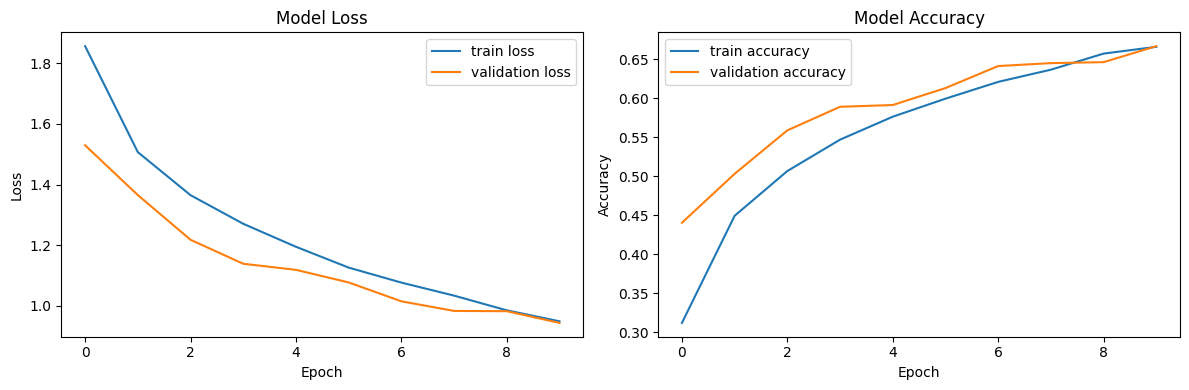

In [ ]:
# Fixed plotting code
import matplotlib.pyplot as plt

h = history

# Plot the loss function value
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot the accuracy value (fixed keys)
plt.subplot(1, 2, 2)
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

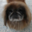

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step
Prediction probabilities: [5.9526431e-04 2.3793933e-04 6.3301988e-02 5.6479931e-01 1.9931984e-03
 2.9023993e-01 7.1704917e-02 4.6067229e-03 5.0846866e-04 2.0121934e-03]
Predicted class index: 3
Predicted class: cat
Confidence: 0.5648

Top 3 predictions:
1. cat: 0.5648
2. dog: 0.2902
3. frog: 0.0717


In [ ]:
# CIFAR-10 Predictive System

import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from PIL import Image

# Define the class labels for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Predictive system
# Manually specify the image path here
input_image_path = '/content/cifar10_data/train/1000.png'  # Change this to your desired image path

# Load and display the input image
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)

# Preprocess the image
# Resize to 32x32 (CIFAR-10 input size)
input_image_resize = cv2.resize(input_image, (32, 32))

# Convert to RGB (OpenCV loads as BGR)
input_image_rgb = cv2.cvtColor(input_image_resize, cv2.COLOR_BGR2RGB)

# Scale the image (normalize to 0-1 range)
input_image_scaled = input_image_rgb / 255.0

# Reshape for model input (add batch dimension)
input_image_reshape = np.reshape(input_image_scaled, [1, 32, 32, 3])

# Make prediction
input_prediction = model.predict(input_image_reshape)
predicted_class_index = np.argmax(input_prediction)
confidence = np.max(input_prediction)

# Display results
print(f"Prediction probabilities: {input_prediction[0]}")
print(f"Predicted class index: {predicted_class_index}")
print(f"Predicted class: {class_names[predicted_class_index]}")
print(f"Confidence: {confidence:.4f}")

# Optional: Show top 3 predictions
top_3_indices = np.argsort(input_prediction[0])[-3:][::-1]
print("\nTop 3 predictions:")
for i, idx in enumerate(top_3_indices):
    print(f"{i+1}. {class_names[idx]}: {input_prediction[0][idx]:.4f}")